# MATH 382 - Fall 2021
## Scientific Computing
Nicholas Zermeno
<hr>

# Lab Assignment #4: Principal Component Analysis and Images

<hr>

## Lab Description and Goals:

In this lab we will use Principal Component Analysis (PCA) to reduce the storage size (dimensions of the data matrix) of a black and white image. <br>

With the exercises below we will practice:
<ol>
    <li><a href= "https://matplotlib.org/stable/api/image_api.html?highlight=matplotlib%20image%20imread#matplotlib.image.imread">Loading images</a> in different formats into a Python workspace </li>
    <li>Store and manipulate images as <tt>NumPy</tt> arrays.</li>
    <li>Visualize an image using <tt>PyPlot.</tt></li>
    <li>Find the principal components of a data/image matrix.</li>
    <li>Determine the number of principal components required to minimize the sum of square errors of the projection of the image into of the <tt>k</tt> dimensional subsspace <em>spanned</em> by the first $k$ principal components of its <em>centered data matrix</em> $X$:<br><br>    
    $$ \text{SSE}(X, B) = \sum \limits_{x_j \in X} \|x_j - \pi_B(x_j)\|^2 $$
    </li>
    <li>Determine the storage space saved by storing an image using the firs $k$ principal components of its (centered) data matrix.</li>
</ol>

<b>Data</b>: We'll use a B&W image for this lab: <a href="https://canvas.csun.edu/courses/100576/files/15682381?module_item_id=4205599"><tt>butterfly.png</tt></a>

<hr>

## <tt>import</tt> Python Packages

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import time

<hr>

Load the image <tt>butterfly.png</tt> into your work space and check its size. <br>

The image is loaded as a 3D <tt>NumPy</tt> array of size $n \times d \times 4$. The first three 2D arrays along the third dimension, <tt>img[:,:,l], i = 0, 1, 2</tt> are identical and the fourth one contains only ones. We will take just the first, <tt>img[:,:,0]</tt>, as our B&W image<br>

<hr>

In [2]:
img = mpimg.imread("../images/butterfly.png")
print('png image shape n x d x 4: ', img.shape)

img_gray = img[:,:,0]

print('original B&W image shape n x d: ', img_gray.shape)

n, d = img_gray.shape

png image shape n x d x 4:  (512, 512, 4)
original B&W image shape n x d:  (512, 512)


<hr>

Visualize the image loaded.

<hr>

(-0.5, 511.5, 511.5, -0.5)

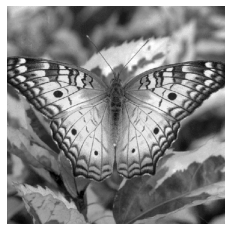

In [3]:
fig2, ax2 = plt.subplots()

ax2.imshow(img_gray, cmap = 'gray')
ax2.axis('off')

<hr>

Now center the image matrix by subtracting from each entry in column $j = 1, 2, \dots, d$, the average of that column:<br><br>
$$x_{i,j} \, \leftarrow x_{i,j} - \bar{x_j} = x_{ij} - \frac{1}{n} \sum_{i = 1}^{n} x_{i,j}$$
<hr>

In [4]:
img_gray_mean0 = np.mean(img_gray, axis = 0)

M0 = np.tile(img_gray_mean0, (n, 1))

X = img_gray - M0

<hr>

Find the SVD of the image matrix $X$ and vefify $X = U S V^\top$:
<hr>

In [5]:
U, s, Vt = LA.svd(X)

print("dimensions of U: ", U.shape)
print("dimensions of V: ", Vt.T.shape)
S = np.diag(s)
if d > n:
    Z = np.zeros([n, d - n])
    S = np.hstack([S,Z])
    
else:
    Z = np.zeros([n-d, d])
    S = np.vstack([S,Z])

print("dimensions of S: ", S.shape)

q = S.dot(Vt)
Xsvd = U.dot(q)

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xsvd[i,:])**2
    
SSEc = 0
for j in range(0,d):
    SSEc += LA.norm(X[:,j] - Xsvd[:,j])**2
    
print('SSE = ', SSE)
print('average SSE = ', SSE/n)

print('SSEc = ', SSEc)
print('average SSEc = ', SSE/d)

dimensions of U:  (512, 512)
dimensions of V:  (512, 512)
dimensions of S:  (512, 512)
SSE =  1.1879971502687046e-11
average SSE =  2.3203069341185637e-14
SSEc =  1.187997150268703e-11
average SSEc =  2.3203069341185637e-14


<hr>

Plot the first 10 singular values of the image matrix.

<hr>

<BarContainer object of 10 artists>

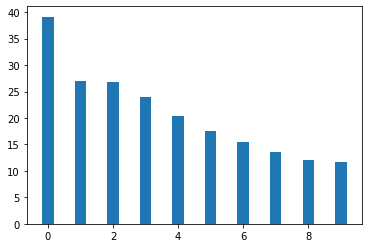

In [6]:

fig5, ax5 = plt.subplots()

position = range(0,10)
width = 0.35

ax5.bar(position, s[0:10], width)

<hr>

Write the code to find the projection of the image data matrix onto the $k$-dimensional subspace span by the first $k$ columns of $V$:<br><br>
$$X_k^\top = V_k Y_k $$

where the columns $\left\{ {\bf v}_j \right\}_{j = 1}^{k}$ of $V_k$ are the first $k$ principal vectors of $X$ and the $i^{th}$ column of $Y_k$, ${\bf y}_i$ ($i = 1, 2, \dots, n$) holds the coefficients $\langle {\bf x}_i, {\bf v}_j \rangle$ of the projection of the $i^{th}$ row of $X$, ${\bf x}_i$, into the $k$-dimensional subspace spanned by the columns of $V_k$, $\left\{ {\bf v}_j \right\}_{j = 1}^{k}$. That is:

$$Y_k = (X V_k)^\top, \ \ \ \ \ {\bf y}_i = (\langle {\bf x}_1, {\bf v}_1\rangle, \langle {\bf x}_1, {\bf v}_2\rangle, \dots, \langle {\bf x}_1, {\bf v}_k\rangle)^\top$$

and

$$X_k = (V_k Y_k)^\top = X V_k V_k^\top, \ \ \ \ \ {\bf x}_i = \langle {\bf x}_1, {\bf v}_1\rangle \, {\bf v}_1 + \langle {\bf x}_1, {\bf v}_2\rangle \, {\bf v}_2 + \dots + \langle {\bf x}_1, {\bf v}_k\rangle \, {\bf v}_k.$$

Then, add the average of the columns of the original matrix (de-center the data matrix) to recover the lower resolution image.

Try different values of $k$ and for each, plot the reduced resolution image and find the sum of square errors of the projection of $X$ onto the $k$-dimensional subspace $B_k$, $SSE(X,B_k)$.

<hr>

SSE(X,B) =  16.1108446004915
Average SSE(X,B) =  0.03146649336033496
original B&W image shape n x d:  (512, 512)


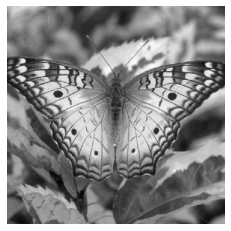

In [7]:
k = 250
V = Vt.T
Vk = V[:,0:k]
Yk = Vk.T.dot(X.T)

ratio = n/(2.0*k+1)
Xk = Vk.dot(Yk).T
img_red = Xk + M0

fig6, ax6 = plt.subplots()

ax6.imshow(img_red, cmap='gray')
ax6.axis('off')

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xk[i,:])**2
    
print('SSE(X,B) = ', SSE)
print('Average SSE(X,B) = ', SSE/n)
print('original B&W image shape n x d: ', img_red.shape)

SSE(X,B) =  55.223873851814346
Average SSE(X,B) =  0.1078591286168249
original B&W image shape n x d:  (512, 512)


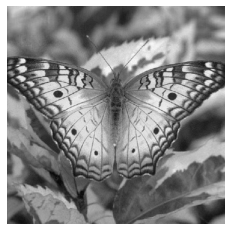

In [8]:
k = 150
V = Vt.T
Vk = V[:,0:k]
Yk = Vk.T.dot(X.T)

ratio = n/(2.0*k+1)
Xk = Vk.dot(Yk).T
img_red = Xk + M0

fig6, ax6 = plt.subplots()

ax6.imshow(img_red, cmap='gray')
ax6.axis('off')

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xk[i,:])**2
    
print('SSE(X,B) = ', SSE)
print('Average SSE(X,B) = ', SSE/n)
print('original B&W image shape n x d: ', img_red.shape)

<hr>

Notice that the low resolution image matrix, $X_k$, is still of size $n \times d$ (not $n \times k$). 

The original matrix $X$ is of size $n \times d$. The matrix $V$ obtained from the SVD fo $X$ is of size $d \times d$, and it is reduced to $V_k$ of size $d \times k$ ($k < d$). We can then find $Y_k = V_k^\top X^\top$, of size $k \times n$, and toss $X$ away. We can then recover the lower resolution matrix $X_k = (V_k Y_k)^\top$, and add the average of the original columns to de-center the data: We replace a matrix $X$ of size $n \times d$ by:
<ol>
    <li>the matrix $V_k$ of size $d \times k$,</li>
    <li>the matrix $Y_k = V_k^\top X^\top$ of size $k \times n$,</li>
    <li>and the vector $\bar{x} = (\bar{x_1}, \bar{x_2}, \dots \bar{x_d})$, whose entries hold the average of the columns of $X$.</li>    
</ol>

Calculate the reduction in storage space for $k = 250, 125, 60$ and $30$, and comment on the gain in data storage reduction vs. the increase of SSE as $k$ is decreased.
<br><br>
What we are essentially doing is taking the SVD of $X$, but we center $X$ so the mean is at the origin. 
So we are reducing the dimensionality of the data and minimizing it since this is essentially SVD. 
$V_k$ is a $k$ dimensional vector that represents the Top-k principal directions of A, while $X_k$ holds the principal values
<hr>

SSE(X,B) =  16.1108446004915
Average SSE(X,B) =  0.03146649336033496
B&W image shape n x k:  (512, 250)
Change in space: 48.828125 % of the space as the original


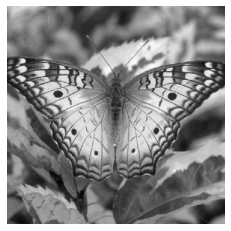

In [9]:
k = 250
V = Vt.T
Vk = V[:,0:k]
Yk = Vk.T.dot(X.T)

ratio = n/(2.0*k+1)
Xk = Vk.dot(Yk).T
img_red = Xk + M0
Z = img_red.dot(Vk)

fig6, ax6 = plt.subplots()

ax6.imshow(img_red, cmap='gray')
ax6.axis('off')

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xk[i,:])**2
    
print('SSE(X,B) = ', SSE)
print('Average SSE(X,B) = ', SSE/n)
print('B&W image shape n x k: ', Z.shape)
print('Change in space:', ((512 * k)/(512 * 512))*100,'% of the space as the original' )

SSE(X,B) =  76.48752198989584
Average SSE(X,B) =  0.1493896913865153
B&W image shape n x k:  (512, 125)
Change in space: 24.4140625 % of the space as the original


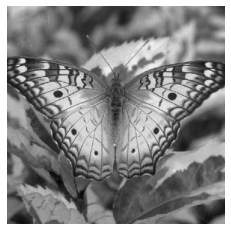

In [10]:

k = 125
V = Vt.T
Vk = V[:,0:k]
Yk = Vk.T.dot(X.T)

ratio = n/(2.0*k+1)
Xk = Vk.dot(Yk).T
img_red = Xk + M0
Z = img_red.dot(Vk)

fig6, ax6 = plt.subplots()

ax6.imshow(img_red, cmap='gray')
ax6.axis('off')

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xk[i,:])**2
    
print('SSE(X,B) = ', SSE)
print('Average SSE(X,B) = ', SSE/n)
print('B&W image shape n x k: ', Z.shape)
print('Change in space:', ((512 * k)/(512 * 512))*100,'% of the space as the original' )

SSE(X,B) =  249.37744085977977
Average SSE(X,B) =  0.48706531417925736
B&W image shape n x k:  (512, 60)
Change in space: 11.71875 % of the space as the original


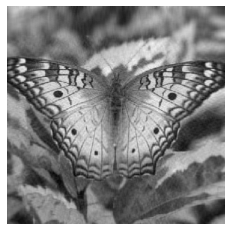

In [11]:

k = 60
V = Vt.T
Vk = V[:,0:k]
Yk = Vk.T.dot(X.T)

ratio = n/(2.0*k+1)
Xk = Vk.dot(Yk).T
img_red = Xk + M0
Z = img_red.dot(Vk)

fig6, ax6 = plt.subplots()

ax6.imshow(img_red, cmap='gray')
ax6.axis('off')

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xk[i,:])**2
    
print('SSE(X,B) = ', SSE)
print('Average SSE(X,B) = ', SSE/n)
print('B&W image shape n x k: ', Z.shape)
print('Change in space:', ((512 * k)/(512 * 512))*100,'% of the space as the original' )

SSE(X,B) =  652.0463531156722
Average SSE(X,B) =  1.2735280334290473
B&W image shape n x k:  (512, 30)
Change in space: 5.859375 % of the space as the original


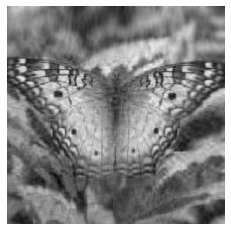

In [12]:

k = 30
V = Vt.T
Vk = V[:,0:k]
Yk = Vk.T.dot(X.T)

ratio = n/(2.0*k+1)
Xk = Vk.dot(Yk).T
img_red = Xk + M0
Z = img_red.dot(Vk)

fig6, ax6 = plt.subplots()

ax6.imshow(img_red, cmap='gray')
ax6.axis('off')

SSE = 0
for i in range(0,n):
    SSE += LA.norm(X[i,:] - Xk[i,:])**2
    
print('SSE(X,B) = ', SSE)
print('Average SSE(X,B) = ', SSE/n)
print('B&W image shape n x k: ', Z.shape)
print('Change in space:', ((512 * k)/(512 * 512))*100,'% of the space as the original' )

As we can see, the last $k = 30$ creates an image that takes up substantially less space than the original. It comes at a steep cost of the SSE being 652 and the image being quite blurry compared to the original. I would say this is not really usable if you are looking for clarity of an image. In this case I think that something like $k = 125$ is a nice middle ground. It takes up only 24% of the space as the original, but still retains much of the detail of the original. 